# 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

 с использованием intercept:

In [9]:
import numpy as np

# Входные данные
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Расчет коэффициентов линейной регрессии с использованием intercept
X = np.vstack([np.ones(len(zp)), zp]).T
B = np.linalg.inv(X.T @ X) @ X.T @ ks
b0, b1 = B[0], B[1]

# Вывод результатов
print(f"Коэффициенты линейной регрессии с использованием intercept: b0 = {b0:.2f}, b1 = {b1:.2f}")


Коэффициенты линейной регрессии с использованием intercept: b0 = 444.18, b1 = 2.62


без использования intercept:

In [10]:
import numpy as np


def linear_regression_no_intercept(x, y):
    w = np.sum(x * y) / np.sum(x ** 2)
    b = 0
    return w, b

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

w, b = linear_regression_no_intercept(zp, ks)
print("Коэффициент линейной регрессии без intercept: w =", w, ", b =", b)


Коэффициент линейной регрессии без intercept: w = 5.889820420132689 , b = 0


# 2 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [12]:
import numpy as np

# входные данные
X = np.array([[35], [45], [190], [200], [40], [70], [54], [150], [120], [110]])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# функция градиентного спуска
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        # делаем предсказание
        y_pred = X.dot(theta)
        # вычисляем ошибку
        error = y_pred - y
        # вычисляем новые значения theta
        theta = theta - alpha * (1/m) * X.T.dot(error)
    return theta

# запускаем функцию градиентного спуска
theta = gradient_descent(X, y, np.array([0.5]), 0.0001, 100000)

# выводим полученный коэффициент
print(theta[0])


5.889820420132688


# 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Коэффициенты линейной регрессии с учетом intercept: [  2.87924752 409.02883842]


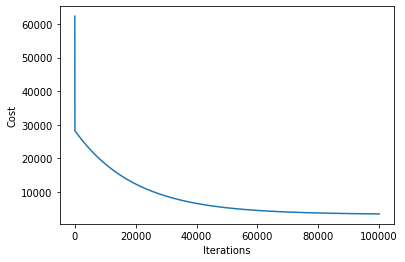

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# задаем данные
X = np.array([[35, 1], [45, 1], [190, 1], [200, 1], [40, 1], [70, 1], [54, 1], [150, 1], [120, 1], [110, 1]])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# задаем начальные значения коэффициентов
theta = np.array([0, 0])

# задаем скорость обучения
alpha = 0.0001

# функция градиентного спуска
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        theta = theta - (alpha * (1/m) * (X.T.dot(error)))
        cost_history[i] = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return theta, cost_history

# запускаем функцию градиентного спуска
theta, cost_history = gradient_descent(X, y, theta, alpha, 100000)

# выводим полученные коэффициенты
print('Коэффициенты линейной регрессии с учетом intercept:', theta)

# выводим график функции стоимости
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
